In [1]:
import torch 
import pandas as pd 
import numpy as np
import torch.nn.functional as F

In [6]:
# Define scores as a tensor instead of a list
scores = torch.tensor([
    [1.2, -torch.inf, -torch.inf, 0.3, 0.7]
])

# Apply softmax along the last dimension
attn_weights = F.softmax(scores, dim=-1)
print(attn_weights)

tensor([[0.4967, 0.0000, 0.0000, 0.2020, 0.3013]])


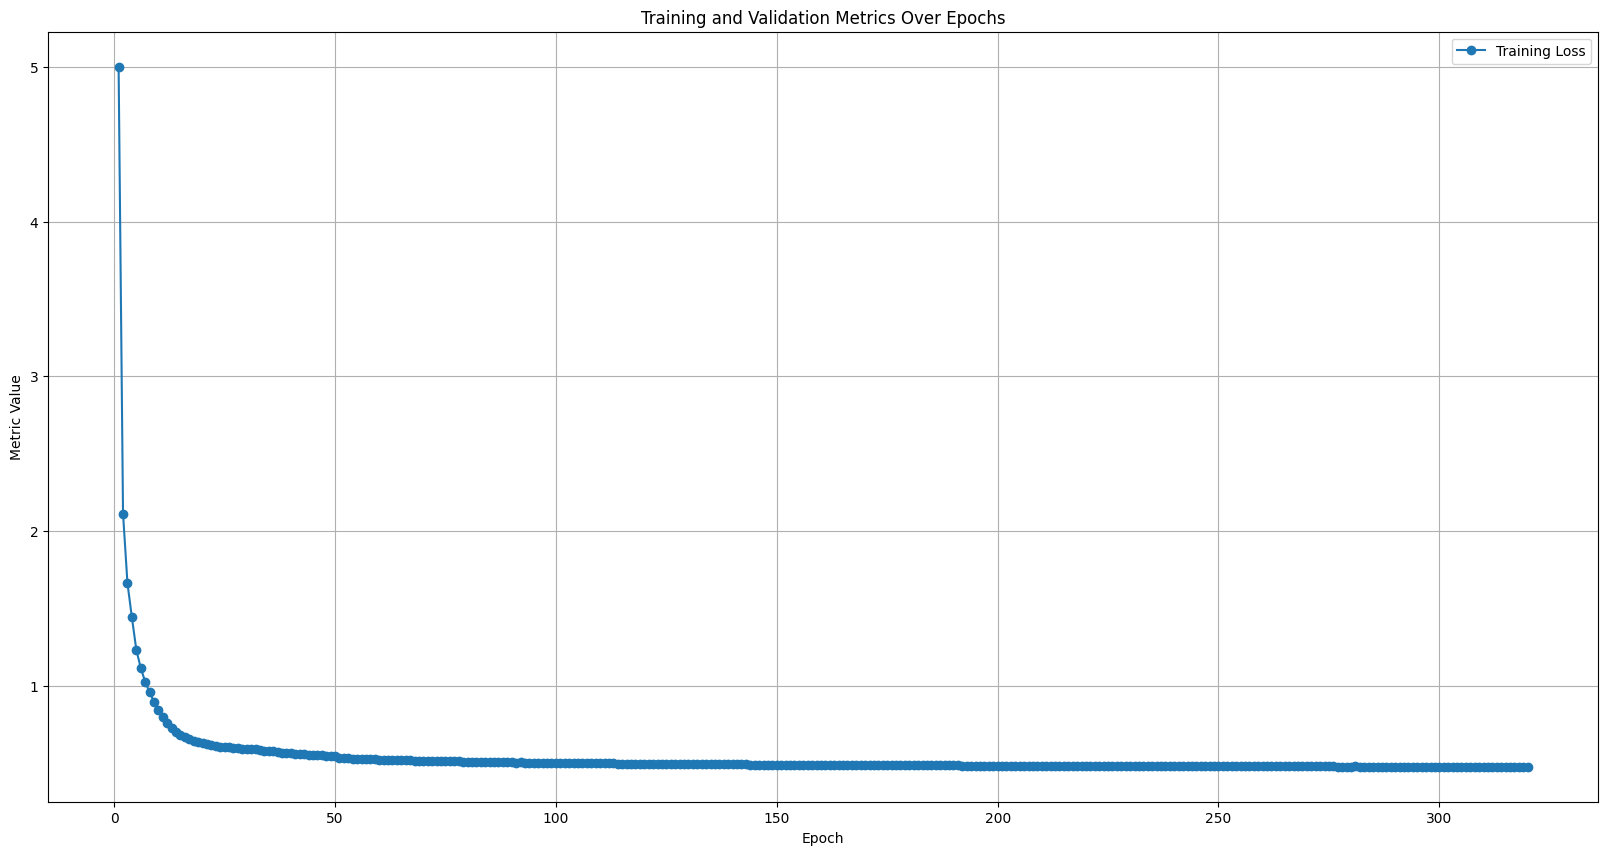

In [23]:
import json
import matplotlib.pyplot as plt

# Load metrics from JSON file
with open('/mnt/storage/huyekgis/brios/BRIOS/models/history/history_attention.json', 'r') as file:
    metrics = json.load(file)

# Extract data for plotting
epochs = list(range(1, len(metrics['train_losses']) + 1))
train_losses = metrics['train_losses']
valid_losses = metrics['valid_losses']
rmses = metrics['rmses']

# Plotting
plt.figure(figsize=(20, 10))

# Training and validation loss
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
# plt.plot([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320],rmses, label="rmse", marker='x')s
# Adding titles and labels
plt.title("Training and Validation Metrics Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()

# Show plot
plt.show()


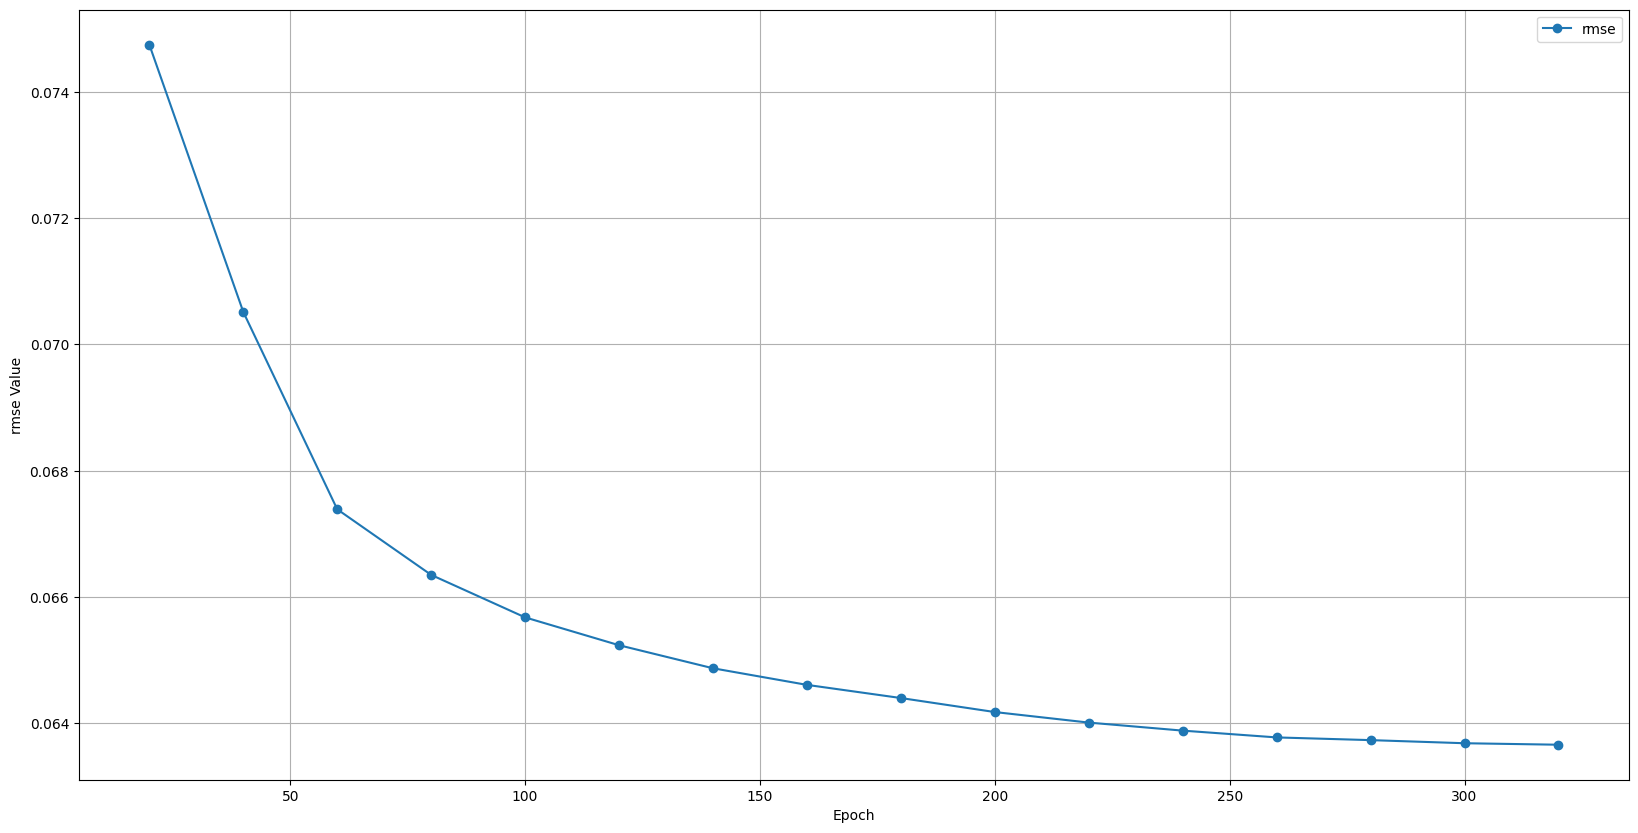

In [21]:
plt.figure(figsize=(20, 10))

# Training and validation loss
plt.plot([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320],rmses, label="rmse", marker='o')
# Adding titles and labels
plt.xlabel("Epoch")
plt.ylabel("rmse Value")
plt.legend()
plt.grid()

# Show plot
plt.show()